In [15]:
import numpy as np
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

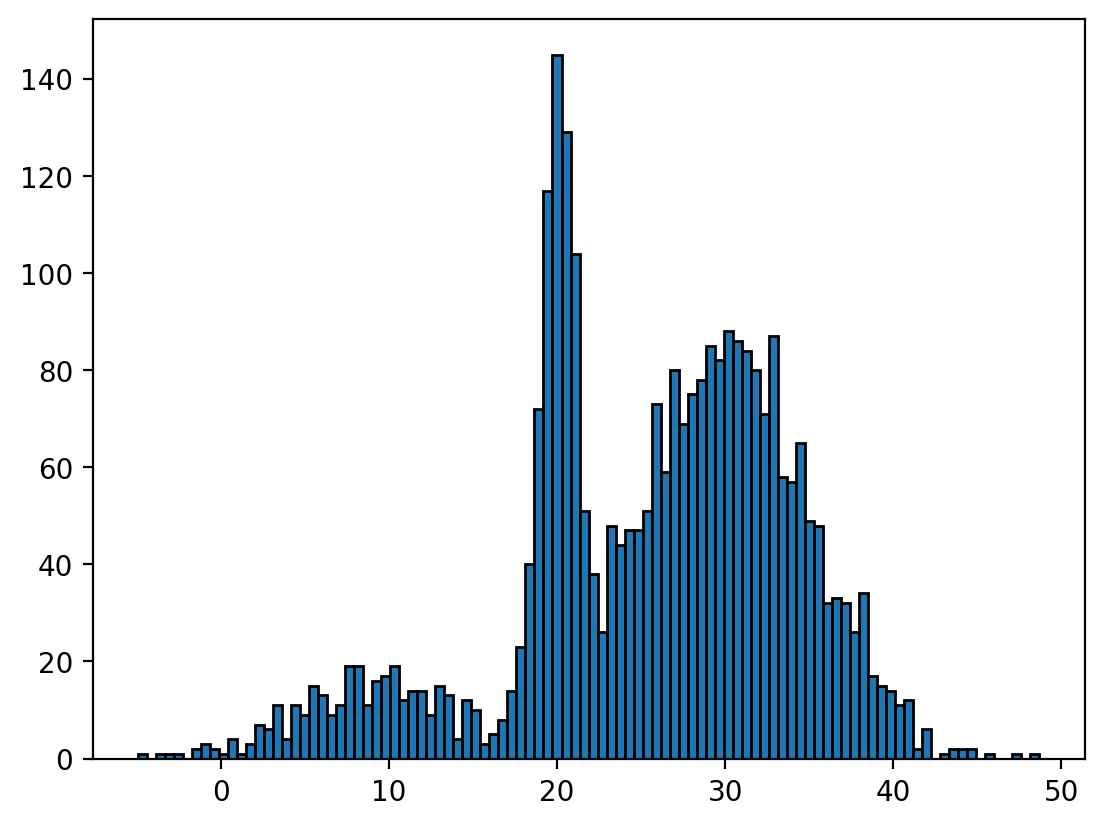

In [16]:
x = np.load("astroML_data/formationchannels.npy")
plt.hist(x, bins = 100, edgecolor = 'black');

3


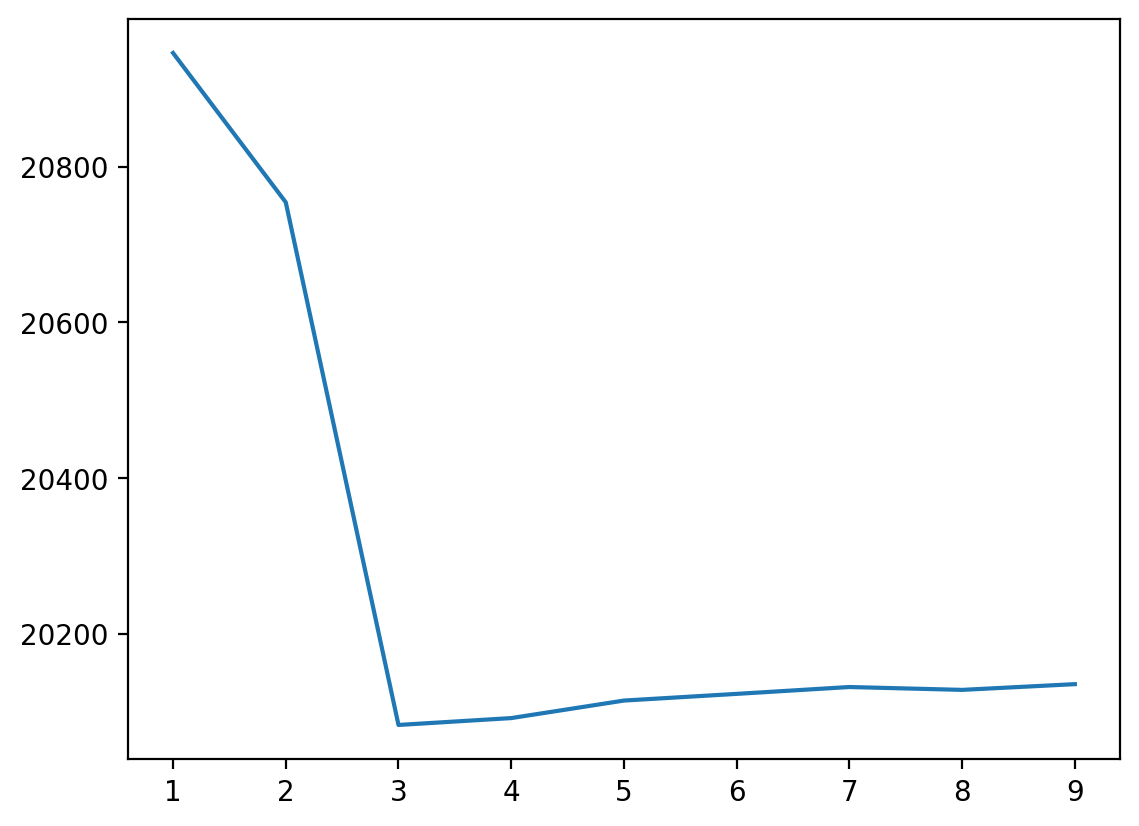

In [131]:
mu = np.array([10, 20, 30])
sigma = np.array([5, 5, 5])

est_mu = np.array([])
n_fit = np.array([])
n_components = np.arange(1,10)

for n in n_components:
    model = GaussianMixture(n, random_state=0)
    model.fit(x)
    n_fit = np.append(n_fit, model.aic(x))
    est_mu = np.append(est_mu, model.means_)
    
plt.plot(n_components, n_fit);
best_fit = n_components[np.argmin(n_fit)]
print(best_fit)
#print(est_mu)

[[3.12959253e-01 2.89546743e-01 3.97494004e-01]
 [4.42827757e-38 3.87585631e-05 9.99961241e-01]
 [7.25599005e-36 5.54356624e-05 9.99944564e-01]
 ...
 [9.27945795e-40 9.99999879e-01 1.21307056e-07]
 [1.09730074e-20 9.99993643e-01 6.35674265e-06]
 [4.54565936e-07 9.99601780e-01 3.97765844e-04]]
[-5.16469266 -4.84040656 -4.78399796 ... -3.28148476 -2.91264474
 -3.27366409]


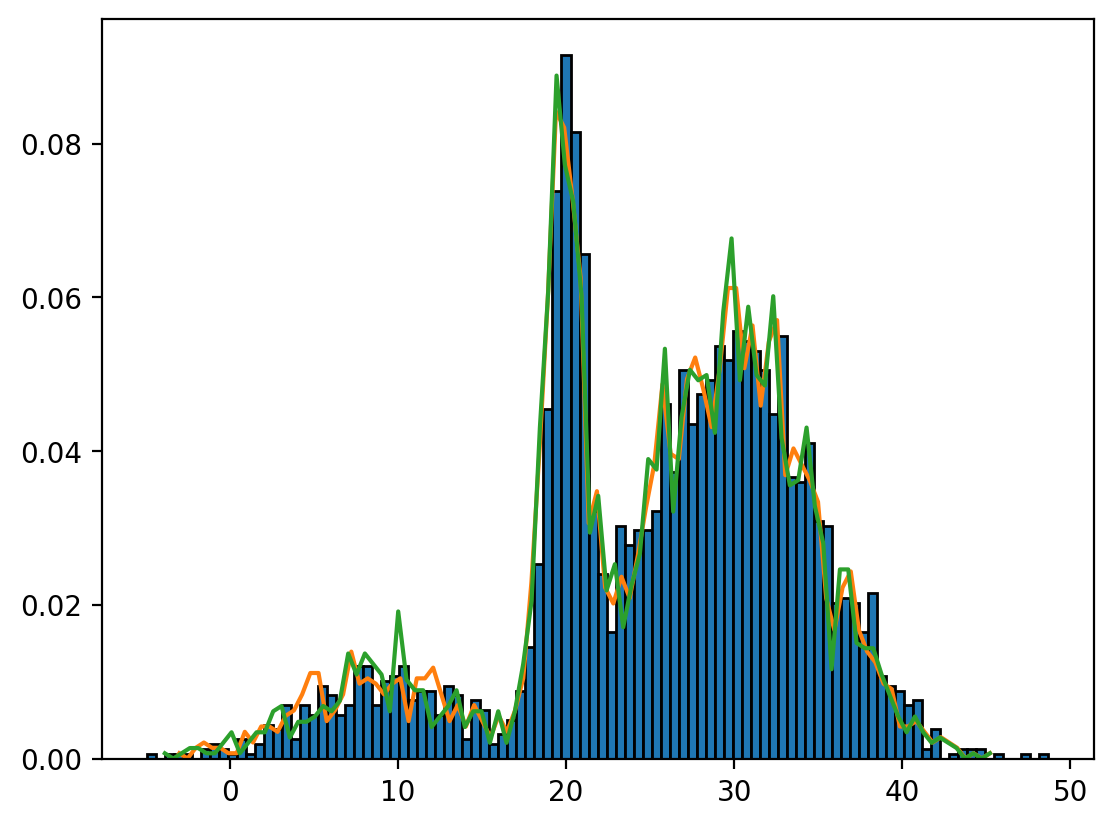

In [137]:
best_model = GaussianMixture(3, random_state=0)
best_model_1 = GaussianMixture(4, random_state=0)
best_model.fit(x)
best_model_1.fit(x)

print(best_model.predict_proba(x))
print(best_model.score_samples(x))


plt.hist(x, bins = 100, edgecolor = 'black', density = True)
n = np.histogram(best_model.sample(len(x))[0], bins = 100, density = True)
b = n[1]
b_1 = n_1[1]

n_1 = np.histogram(best_model_1.sample(len(x))[0], bins = 100, density = True)
plt.plot(b[:-1] , n[0]);
plt.plot(b_1[:-1],n_1[0]);